# **1. 데이터 파일 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 제공된 3개의 데이터 불러오기 

import pandas as pd
import seaborn as sns
import numpy as np


data20_NPA = pd.read_csv('/content/drive/MyDrive/NPA2020.csv', encoding='euc-kr', encoding_errors='ignore')
data20_KP = pd.read_csv('/content/drive/MyDrive/KP2020.csv', encoding='euc-kr')
data21 = pd.read_csv('/content/drive/MyDrive/KP2021.csv', encoding='euc-kr')

In [ ]:
# 원본 데이터 행열

print(data20_NPA.shape)
print(data20_KP.shape)
print(data21.shape)

(1178244, 10)
(77077, 10)
(2594060, 10)


In [ ]:
# 교통사고 데이터 추출 ---> 교통사고와 관련한 코드들만 추출
data20_NPA_traffic = data20_NPA[(data20_NPA['EVT_CL_CD'] == 4) | (data20_NPA['EVT_CL_CD'] == 401) | (data20_NPA['EVT_CL_CD'] == 402) | (data20_NPA['EVT_CL_CD'] == 403) | (data20_NPA['EVT_CL_CD'] == 404) | (data20_NPA['EVT_CL_CD'] == 405) | (data20_NPA['EVT_CL_CD'] == 406)]
data20_KP_traffic = data20_KP[(data20_KP['EVT_CL_CD'] == 4) | (data20_KP['EVT_CL_CD'] == 401) | (data20_KP['EVT_CL_CD'] == 402) | (data20_KP['EVT_CL_CD'] == 403) | (data20_KP['EVT_CL_CD'] == 404) | (data20_KP['EVT_CL_CD'] == 405) | (data20_KP['EVT_CL_CD'] == 406)]
data21_traffic = data21[(data21['EVT_CL_CD'] == 4) | (data21['EVT_CL_CD'] == 401) | (data21['EVT_CL_CD'] == 402) | (data21['EVT_CL_CD'] == 403) | (data21['EVT_CL_CD'] == 404)| (data21['EVT_CL_CD'] == 405) | (data21['EVT_CL_CD'] == 406)]

print(data20_NPA_traffic.shape)
print(data20_KP_traffic.shape)
print(data21_traffic.shape)

(142928, 10)
(9343, 10)
(278326, 10)


In [ ]:
data20_NPA_traffic.head()

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
38,20200101,3240,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN
41,20200101,3532,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN
54,20200101,2135,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN
66,20200101,4301,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN
117,20200101,184335,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N


In [ ]:
data20_KP_traffic.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
7,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
8,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
9,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
10,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN


In [ ]:
data21_traffic.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
14,충남청,21/03/07 00:02:48.000000000,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN
20,충남청,21/03/07 00:09:04.000000000,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y
23,대전청,21/03/07 00:07:54.000000000,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN
26,대전청,21/03/07 00:15:27.000000000,13,10,401,1.0,대전광역시 유성구 상대동 471-2,127.339334,36.346899,NaN
44,충남청,21/03/07 00:12:08.000000000,19,10,403,2.0,충청남도 공주시 우성면 평목리,127.090733,36.453397,NaN


**최종적으로 활용하고자 선택한 데이터는 KP2020과 KP2021 데이터**  
--->  컬럼 정의 방식 및 기간의 차이일 뿐, 데이터 간 차이가 없고 2021년의 데이터가 KP형태이기 때문에 KP2020을 선택.

# **2. 데이터 EDA 및 전처리**

In [ ]:
# 1. KP파일 2020, 2021년 파일들을 행을 기준으로 합치기 
data=pd.concat([data20_KP_traffic, data21_traffic], ignore_index=True) 

In [ ]:
data.head()  # 교통사고 코드만 + 2020년과 2021년 데이터 파일 합치기 

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
1,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
2,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
3,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
4,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN


In [ ]:
# 2. 데이터 변수들의 이름을 rename 함수를 이용해서 알아보기 쉽게 변경 
data.rename(columns = {'HPPN_X' : 'longitude', 'HPPN_Y': 'latitude', 'RPTER_SEX': 'sex', 'RECV_DEPT_NM': 'police_location', 'NPA_CL':'police_code', 'EVT_STAT_CD':'stat', 'EVT_CL_CD':'type', 'HPPN_PNU_ADDR':'location'}, inplace = True)

In [ ]:
data.head() # 변수의 이름 변경 후의 데이터 프레임 

,police_location,RECV_CPLT_DM,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN
0,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
1,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,NaN
2,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,NaN
3,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,NaN
4,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,NaN


In [ ]:
data.isnull().sum() #결측치 확인하기 

police_location         0
RECV_CPLT_DM            0
police_code             0
stat                    0
type                    0
sex                     0
location             7478
longitude            1866
latitude             1866
SME_EVT_YN         218799
dtype: int64

In [ ]:
 # 3. SME_EVT_YN(동일사건여부) 결측치를  'N'으로 변경 
data['SME_EVT_YN'] = data['SME_EVT_YN'].fillna("N")

# ----> 원본 데이터에서 동일사건여부 변수의 결측치 값을(알 수 없는 값) 동일사건이 발생하지 않았다고 가정한 채 'N'으로 변경해 줌. 

In [ ]:
# 4. 위도와 경도 변수에서 결측치가 있는 1866개의 행을 제거 
data=data.dropna(subset=['longitude','latitude'])

In [ ]:
# 5. 공백을 기준으로 리스트로 나누고 인덱싱 이용해서([0]) 날짜 변수 생성 
data['date'] = pd.DataFrame(data.RECV_CPLT_DM.str.split().str[0])  

In [ ]:
# 6. 공백일 기준으로 리스트로 나누고 인덱싱 이용해서([1]) 시간 변수 생성 
data['time'] = pd.DataFrame(data.RECV_CPLT_DM.str.split().str[1])  

In [ ]:
data.head() # 'date' 변수와 'time' 변수가 잘 생성됨을 확인 

,police_location,RECV_CPLT_DM,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,time
0,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,20/12/01,08:17:50.000000000
1,대전청,20/12/01 03:24:26.000000000,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,20/12/01,03:24:26.000000000
2,충남청,20/12/01 07:37:18.000000000,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,20/12/01,07:37:18.000000000
3,대전청,20/12/01 07:08:44.000000000,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,20/12/01,07:08:44.000000000
4,대전청,20/12/01 07:09:20.000000000,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,20/12/01,07:09:20.000000000


In [ ]:
# 7. RECV_CPLT_DM 변수 제거
data=data.drop(['RECV_CPLT_DM'],axis=1) 
# -----> 위에서 'date'와 'time' 변수가 생성됐기 때문에 제거 

In [ ]:
data.isnull().sum() #현재 'location' 변수에만 결측치가 존재함을 확인.

police_location       0
police_code           0
stat                  0
type                  0
sex                   0
location           5750
longitude             0
latitude              0
SME_EVT_YN            0
date                  0
time                  0
dtype: int64

In [ ]:
# 8. 'location' 변수의 값들 중 결측치가 있는 행 제거 

# 각 변수들이 갖는 결측치 값들과 결측치 비율을 확인 
df_missing = data
np.sum(df_missing.isnull())
missing_number = df_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_number/len(df_missing)
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info.head(50) 

# 데이터의 값들 중에서 location의 변수들의 결측치의 비율이 2%정도 밖에 안 됨을 확인
# --> 전체 285803 행에서 2%는 극소수 이기 떄문에 결측치 행 제거하려고 함. 

,missing number,missing percentage
location,5750,0.020119
police_location,0,0.000000
police_code,0,0.000000
stat,0,0.000000
type,0,0.000000
sex,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
SME_EVT_YN,0,0.000000
date,0,0.000000


In [ ]:
data = data.dropna(axis=0) # 결측치가 있는 행 전부 제거 

In [ ]:
data.isnull().sum() # 결측치 모두 제거 완료

police_location    0
police_code        0
stat               0
type               0
sex                0
location           0
longitude          0
latitude           0
SME_EVT_YN         0
date               0
time               0
dtype: int64

In [ ]:
data.info()  # date 변수가 object 척도라 날짜 척도로 변경 필요 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280053 entries, 0 to 287668
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   police_location  280053 non-null  object 
 1   police_code      280053 non-null  int64  
 2   stat             280053 non-null  int64  
 3   type             280053 non-null  int64  
 4   sex              280053 non-null  float64
 5   location         280053 non-null  object 
 6   longitude        280053 non-null  float64
 7   latitude         280053 non-null  float64
 8   SME_EVT_YN       280053 non-null  object 
 9   date             280053 non-null  object 
 10  time             280053 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 25.6+ MB


In [ ]:
# 9. 'date' 변수의 척도를 object에서 날짜 척도로 변경 

data['date'] = '20' + data['date'].astype(str)
data.head()

<ipython-input-24-e91042356923>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = '20' + data['date'].astype(str)


,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,time
0,충남청,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020/12/01,08:17:50.000000000
1,대전청,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020/12/01,03:24:26.000000000
2,충남청,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020/12/01,07:37:18.000000000
3,대전청,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020/12/01,07:08:44.000000000
4,대전청,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020/12/01,07:09:20.000000000


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

<ipython-input-25-fe951d4bf08a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')


In [ ]:
data.info() # 'datetime64(날짜척도)로 잘 변경되었음을 확인 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280053 entries, 0 to 287668
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   police_location  280053 non-null  object        
 1   police_code      280053 non-null  int64         
 2   stat             280053 non-null  int64         
 3   type             280053 non-null  int64         
 4   sex              280053 non-null  float64       
 5   location         280053 non-null  object        
 6   longitude        280053 non-null  float64       
 7   latitude         280053 non-null  float64       
 8   SME_EVT_YN       280053 non-null  object        
 9   date             280053 non-null  datetime64[ns]
 10  time             280053 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 25.6+ MB


In [ ]:
# 10. 'date' 변수를 이용해서 년도, 월, 일 추출 

data['year'] = data['date'].dt.year # 년도 추출
data['month'] = data['date'].dt.month # 월 추출
data['day'] = data['date'].dt.day # 일 추출

data.head()

<ipython-input-27-48445014e96c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year # 년도 추출
<ipython-input-27-48445014e96c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month # 월 추출
<ipython-input-27-48445014e96c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,time,year,month,day
0,충남청,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020-12-01,08:17:50.000000000,2020,12,1
1,대전청,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020-12-01,03:24:26.000000000,2020,12,1
2,충남청,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020-12-01,07:37:18.000000000,2020,12,1
3,대전청,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020-12-01,07:08:44.000000000,2020,12,1
4,대전청,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020-12-01,07:09:20.000000000,2020,12,1


In [ ]:
# 11. 'time' 변수의 소수점 아래자리 제거 
data['time'] = pd.DataFrame(data.time.str.split('.').str[0]) 

<ipython-input-28-653e817cbbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.DataFrame(data.time.str.split('.').str[0])


In [ ]:
# 12. 'hour' , 'minute', 'second' 변수 생성 
data['hour'] = pd.DataFrame(data.time.str.split(':').str[0])
data['minute'] = pd.DataFrame(data.time.str.split(':').str[1])
data['second'] = pd.DataFrame(data.time.str.split(':').str[2])

<ipython-input-29-7e46f2253811>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = pd.DataFrame(data.time.str.split(':').str[0])
<ipython-input-29-7e46f2253811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minute'] = pd.DataFrame(data.time.str.split(':').str[1])
<ipython-input-29-7e46f2253811>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
# 13. 'hour' , 'minute', 'second' 변수 숫자 척도로 변경 
data['hour'] = data['hour'].apply(pd.to_numeric)
data['minute'] = data['minute'].apply(pd.to_numeric)
data['second'] = data['second'].apply(pd.to_numeric)

<ipython-input-30-feb7606843f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['hour'].apply(pd.to_numeric)
<ipython-input-30-feb7606843f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minute'] = data['minute'].apply(pd.to_numeric)
<ipython-input-30-feb7606843f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
data=data.drop(['time'],axis=1) # time 변수 제거 ----> 위에서 'hour' , 'minute', 'second' 변수 생성했으니 'time' 변수 제거 

In [ ]:
data.head() # 3가지 변수가 잘 생성되었음을 확인 

,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,year,month,day,hour,minute,second
0,충남청,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020-12-01,2020,12,1,8,17,50
1,대전청,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020-12-01,2020,12,1,3,24,26
2,충남청,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020-12-01,2020,12,1,7,37,18
3,대전청,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020-12-01,2020,12,1,7,8,44
4,대전청,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020-12-01,2020,12,1,7,9,20


In [ ]:
# 14. 날짜 형식 'date' 변수의 값을 이용해서 요일 변수 'datetime' 생성 
weekday_list = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

data['datetime'] = data['date'].dt.dayofweek

data.loc[data['datetime'] == 0, 'datetime'] = 'MON'
data.loc[data['datetime'] == 1, 'datetime'] = 'TUE'
data.loc[data['datetime'] == 2, 'datetime'] = 'WED'
data.loc[data['datetime'] == 3, 'datetime'] = 'THU'
data.loc[data['datetime'] == 4, 'datetime'] = 'FRI'
data.loc[data['datetime'] == 5, 'datetime'] = 'SAT'
data.loc[data['datetime'] == 6, 'datetime'] = 'SUN'

In [ ]:
# 어떤 경찰철으로 구분되어 있는지 알아보기
data['police_location'].unique()

array(['충남청', '대전청', '대전파출소', '대전중부', '대전유성', '서대전지구대', '남대전지구대',
       '대전역지구대', '세종', '대전동부', '세종청', '대전둔산', '대전대덕', '세종로파출소', '대전서부',
       '세종서', '대전동부서', '대전서부서', '대전중부서', '대전둔산서', '대전유성서', '대전대덕서',
       '세종남부서', '세종북부서', '세종대왕파출소'], dtype=object)

In [ ]:
# 15. 경찰청 위치를 숫자 코드로 변환(묶을 수 있는 지역끼리는 묶어서 동일한 숫자 코드 부여)

data['real_code'] = data['police_location'].replace(['충남청', '대전청', '대전파출소', '대전중부', '대전유성', '서대전지구대', '남대전지구대',
       '대전역지구대', '세종', '대전동부', '세종청', '대전둔산', '대전대덕', '세종로파출소', '대전서부',
       '세종서', '대전동부서', '대전서부서', '대전중부서', '대전둔산서', '대전유성서', '대전대덕서',
       '세종남부서', '세종북부서', '세종대왕파출소'], [19, 13, 13, 13, 13, 13, 13, 13, 31, 13, 31, 13, 13, 31, 13, 31, 13, 13, 13, 13, 13, 13, 31, 31, 31])

In [ ]:
data['police_code'].value_counts() #  'police_code' 의 개수 세기

19    157132
13    100753
31     16662
18      2351
15      1978
20       679
21       143
8        116
11        73
16        35
22        34
10        19
17        18
23        18
9         14
12        12
24         9
14         7
Name: police_code, dtype: int64

In [ ]:
data['real_code'].value_counts() #  'real_code' 의 개수 세기

19    175423
13    104362
31       268
Name: real_code, dtype: int64

In [ ]:
# 16. 이관되지 않은 행만 추출; 접수부서코드 및 발생지점과 경찰청구분이 같은 경우
data3 = data[data['police_code'] == data['real_code']]
data3.head()

,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,year,month,day,hour,minute,second,datetime,real_code
0,충남청,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020-12-01,2020,12,1,8,17,50,TUE,19
1,대전청,13,10,406,1.0,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020-12-01,2020,12,1,3,24,26,TUE,13
2,충남청,19,10,402,1.0,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020-12-01,2020,12,1,7,37,18,TUE,19
3,대전청,13,10,401,1.0,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020-12-01,2020,12,1,7,8,44,TUE,13
4,대전청,13,10,401,2.0,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020-12-01,2020,12,1,7,9,20,TUE,13


In [ ]:
# 17. 성별 값 대체 -----> 숫자로 표현된 것을 글자로 바꿈
data3 = data3.replace({'sex' : 1.0}, 'Man')
data3 = data3.replace({'sex' : 2.0}, 'Woman')
data3 = data3.replace({'sex' : 3.0}, 'Unknown')

In [ ]:
# 18. 경찰청 코드 대체 ----> 숫자로 표현된 것을 글자로 바꿈
data3 = data3.replace({'real_code' : 13}, 'Daejeon')
data3 = data3.replace({'real_code' : 19}, 'South Chungcheong')
data3 = data3.replace({'real_code' : 31}, 'Sejong')

In [ ]:
# 19. 교통사고 종류 코드 숫자를 한글로 변환 
data3
data3 = data3.replace({'type' : 401}, '교통사고')
data3 = data3.replace({'type' : 402}, '교통불편')
data3 = data3.replace({'type' : 403}, '교통위반')
data3 = data3.replace({'type' : 404}, '사망.대형사고')
data3 = data3.replace({'type' : 405}, '인피도주')
data3 = data3.replace({'type' : 406}, '음주운전')

# ----> 태블로 시각화에서 필터링 기능을 직관적으로 이용하기 위해 교통사고 종류 코드를 한글로 변경 

In [ ]:
# 20. 'location' 변수 이용해서 '지역명' 변수 생성 
filtering_df = data3['location'].str.contains("대전|대전광역시|세종특별자치시|충청남도|충남", na=False)
subset_police = data3[filtering_df]
print(subset_police.shape)

data3 = subset_police

# 'location' 변수에서 이관주소, 공중전화 문자열만 제거후 지역명, 시군구 변수 생성
data3['location'] = data3['location'].str.replace(r"\[.*\] ","")

data3['지역명'] = pd.DataFrame(data3.location.str.split(' ').str[0])
data3['시군구'] = pd.DataFrame(data3.location.str.split(' ').str[1])

data3 = data3.replace({'지역명' : '대전'}, '대전광역시')
data3 = data3.replace({'지역명' : '충남'}, '충청남도')

data3['지역명'].unique()

# ----> 태블로 시각화에서 필터링 기능을 직관적으로 이용하기 위해 지역명, 시군구 변수를 새로 생성 

(253280, 18)


<ipython-input-42-80b313a6ce2a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data3['location'] = data3['location'].str.replace(r"\[.*\] ","")


array(['충청남도', '대전광역시', '세종특별자치시'], dtype=object)

In [ ]:
data3.head() # 모든 전처리 과정이 다 끝난 데이터프레임 완성 

,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,year,month,day,hour,minute,second,datetime,real_code,지역명,시군구
0,충남청,19,10,교통사고,Woman,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020-12-01,2020,12,1,8,17,50,TUE,South Chungcheong,충청남도,천안시
1,대전청,13,10,음주운전,Man,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020-12-01,2020,12,1,3,24,26,TUE,Daejeon,대전광역시,유성구
2,충남청,19,10,교통불편,Man,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020-12-01,2020,12,1,7,37,18,TUE,South Chungcheong,충청남도,천안시
3,대전청,13,10,교통사고,Man,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020-12-01,2020,12,1,7,8,44,TUE,Daejeon,대전광역시,중구
4,대전청,13,10,교통사고,Woman,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020-12-01,2020,12,1,7,9,20,TUE,Daejeon,대전광역시,중구


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253280 entries, 0 to 287668
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   police_location  253280 non-null  object        
 1   police_code      253280 non-null  int64         
 2   stat             253280 non-null  int64         
 3   type             253280 non-null  object        
 4   sex              253280 non-null  object        
 5   location         253280 non-null  object        
 6   longitude        253280 non-null  float64       
 7   latitude         253280 non-null  float64       
 8   SME_EVT_YN       253280 non-null  object        
 9   date             253280 non-null  datetime64[ns]
 10  year             253280 non-null  int64         
 11  month            253280 non-null  int64         
 12  day              253280 non-null  int64         
 13  hour             253280 non-null  int64         
 14  minute           253

In [ ]:
# 데이터 내보내기 
# data3.to_csv('/content/drive/MyDrive/police.csv', sep=',', encoding='utf-8', index=False)

총 19가지의 데이터 전처리 과정을 거쳐서 이후 태블로 시각화에 적용할 최종 데이터 생성 가능

# **3. 시각화**

In [ ]:
import matplotlib.pyplot as plt

## **1) 시계열 데이터 그래프**

In [ ]:
data3['CNT'] = 1
data_r=data3

data_r.set_index(data_r['date'], inplace=True)
data_r.head()

,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,date,...,month,day,hour,minute,second,datetime,real_code,지역명,시군구,CNT
date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,충남청,19,10,교통사고,Woman,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,N,2020-12-01,...,12,1,8,17,50,TUE,South Chungcheong,충청남도,천안시,1
2020-12-01,대전청,13,10,음주운전,Man,대전광역시 유성구 봉명동(행정:온천1동) 575,127.341551,36.353696,N,2020-12-01,...,12,1,3,24,26,TUE,Daejeon,대전광역시,유성구,1
2020-12-01,충남청,19,10,교통불편,Man,충청남도 천안시 서북구 성환읍 성월리(행정:성환읍) 150,127.136142,36.917900,N,2020-12-01,...,12,1,7,37,18,TUE,South Chungcheong,충청남도,천안시,1
2020-12-01,대전청,13,10,교통사고,Man,대전광역시 중구 석교동(석교동) 85-14,127.447545,36.306724,N,2020-12-01,...,12,1,7,8,44,TUE,Daejeon,대전광역시,중구,1
2020-12-01,대전청,13,10,교통사고,Woman,대전광역시 중구 석교동(행정:석교동) 88-11,127.447175,36.306694,N,2020-12-01,...,12,1,7,9,20,TUE,Daejeon,대전광역시,중구,1


In [ ]:
dataset_m = data_r.resample('M')['CNT'].agg(np.sum).fillna(0)
dataset_m.head()

date
2020-12-31    8143
2021-01-31    7056
2021-02-28    7382
2021-03-31    8877
2021-04-30    8805
Freq: M, Name: CNT, dtype: int64

Text(0, 0.5, 'CNT')

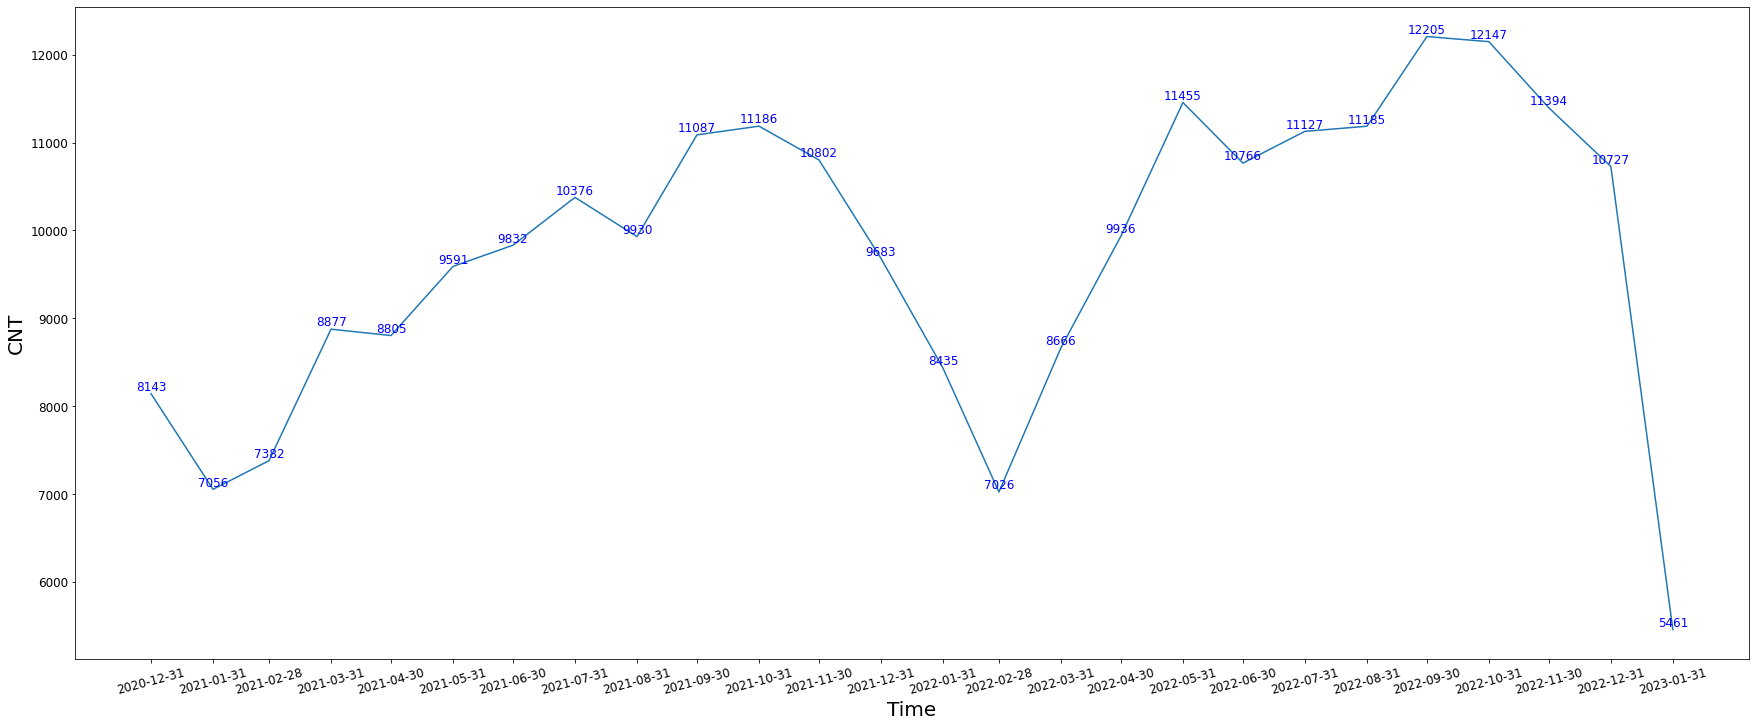

In [ ]:
x = dataset_m.index # x축(시간 정보)
y = dataset_m # y축 값(데이터 개수)

plt.figure(figsize = (30, 12)) # 전체 figure 크기
plt.plot(dataset_m) # 그래프 시각화

# 값 시각화
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 12, 
             color = 'blue',
             horizontalalignment ='center',
             verticalalignment = 'bottom')
plt.xticks(x, fontsize = 12, rotation = 15) # x축
plt.yticks(fontsize = 12) # y축 눈금
plt.xlabel('Time', fontsize = 20) # x축 이름
plt.ylabel('CNT', fontsize = 20) # y축 이름

* 2022년 9월~10월에 제일 교통사고 신고 접수가 많았다. (여름-가을)
* 대체로 년 기준 하반기에 교통사고가 많고 상반기에 상대적으로 접수 횟수가 낮음

## **2) 막대그래프**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### a. 성별에 따른 신고 수

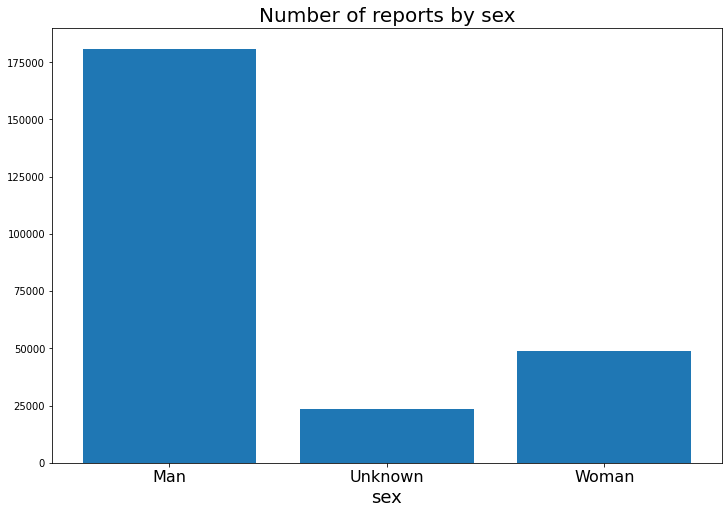

In [ ]:
# 성별
data3_agg = data3.groupby('sex', as_index = False).count()

# box-plot after changing the order of x-axis ticks
plt.figure(figsize=(12, 8))
plt.bar(data3_agg.sex, data3_agg.stat)
plt.title("Number of reports by sex", fontsize=20)
plt.xlabel("sex", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### b. 요일에 따른 신고 수

In [ ]:
data3_agg = data3.groupby('datetime', as_index = False).count()
data3_agg

,datetime,police_location,police_code,stat,type,sex,location,longitude,latitude,SME_EVT_YN,...,year,month,day,hour,minute,second,real_code,지역명,시군구,CNT
0,FRI,39640,39640,39640,39640,39640,39640,39640,39640,39640,...,39640,39640,39640,39640,39640,39640,39640,39640,39640,39640
1,MON,34557,34557,34557,34557,34557,34557,34557,34557,34557,...,34557,34557,34557,34557,34557,34557,34557,34557,34557,34557
2,SAT,41392,41392,41392,41392,41392,41392,41392,41392,41392,...,41392,41392,41392,41392,41392,41392,41392,41392,41392,41392
3,SUN,32475,32475,32475,32475,32475,32475,32475,32475,32475,...,32475,32475,32475,32475,32475,32475,32475,32475,32475,32475
4,THU,35255,35255,35255,35255,35255,35255,35255,35255,35255,...,35255,35255,35255,35255,35255,35255,35255,35255,35255,35255
5,TUE,34855,34855,34855,34855,34855,34855,34855,34855,34855,...,34855,34855,34855,34855,34855,34855,34855,34855,34855,34855
6,WED,35106,35106,35106,35106,35106,35106,35106,35106,35106,...,35106,35106,35106,35106,35106,35106,35106,35106,35106,35106


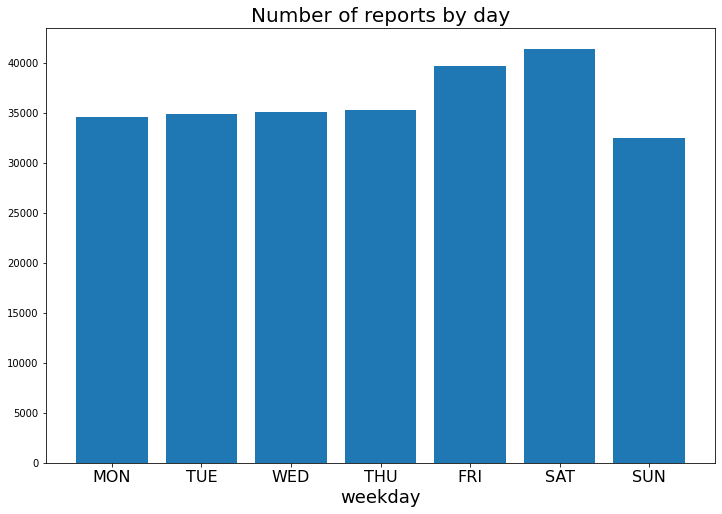

In [ ]:
# 요일
data3_agg = data3.groupby('datetime', as_index = False).count()

## changing the order of x-axis label using loc
data3_agg.set_index('datetime', inplace=True)
weekday_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
data3_agg = data3_agg.loc[weekday_order]

# # box-plot after changing the order of x-axis ticks
plt.figure(figsize=(12, 8))
plt.bar(data3_agg.index, data3_agg.stat)
plt.title("Number of reports by day", fontsize=20)
plt.xlabel("weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()


### c. 경찰청에 따른 신고 수

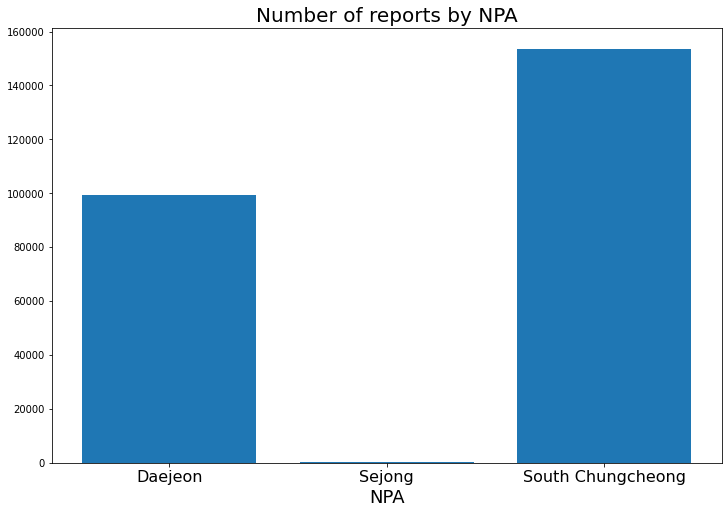

In [ ]:
# 경찰청
data3_agg = data3.groupby('real_code', as_index = False).count()

# box-plot after changing the order of x-axis ticks
plt.figure(figsize=(12, 8))
plt.bar(data3_agg.real_code, data3_agg.stat)
plt.title("Number of reports by NPA", fontsize=20)
plt.xlabel("NPA", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### d. 시간대에 따른 신고 수

In [ ]:
# 0시부터 2시간 간격으로 신고수 세기
print('0-1:', len(data3.loc[(data3['hour'] == 0) | (data3['hour'] == 1)]))
print('2-3:', len(data3.loc[(data3['hour'] == 2) | (data3['hour'] == 3)]))
print('4-5:', len(data3.loc[(data3['hour'] == 4) | (data3['hour'] == 5)]))
print('6-7:', len(data3.loc[(data3['hour'] == 6) | (data3['hour'] == 7)]))
print('8-9:', len(data3.loc[(data3['hour'] == 8) | (data3['hour'] == 9)]))
print('10-11:', len(data3.loc[(data3['hour'] == 10) | (data3['hour'] == 11)]))
print('12-13:', len(data3.loc[(data3['hour'] == 12) | (data3['hour'] == 13)]))
print('14-15:', len(data3.loc[(data3['hour'] == 14) | (data3['hour'] == 15)]))
print('16-17:', len(data3.loc[(data3['hour'] == 16) | (data3['hour'] == 17)]))
print('18-19:', len(data3.loc[(data3['hour'] == 18) | (data3['hour'] == 19)]))
print('20-21:', len(data3.loc[(data3['hour'] == 20) | (data3['hour'] == 21)]))
print('22-23:', len(data3.loc[(data3['hour'] == 22) | (data3['hour'] == 23)]))

0-1: 16414
2-3: 8525
4-5: 5807
6-7: 10362
8-9: 20795
10-11: 22946
12-13: 25678
14-15: 28502
16-17: 30567
18-19: 31625
20-21: 27391
22-23: 24668


In [ ]:
# 시간 별 신고수로 새로운 데이터프레임 만들기
bytime_data = pd.DataFrame({'TI':['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19', '20-21', '22-23'],
                            'counts':[16625, 8635, 5891, 10571, 21528, 23931, 26565, 29595, 31724, 32598, 28003, 25060]}, dtype = int)
bytime_data

<ipython-input-56-bdcc9c772e22>:2: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  bytime_data = pd.DataFrame({'TI':['0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19', '20-21', '22-23'],


,TI,counts
0,0-1,16625
1,2-3,8635
2,4-5,5891
3,6-7,10571
4,8-9,21528
5,10-11,23931
6,12-13,26565
7,14-15,29595
8,16-17,31724
9,18-19,32598


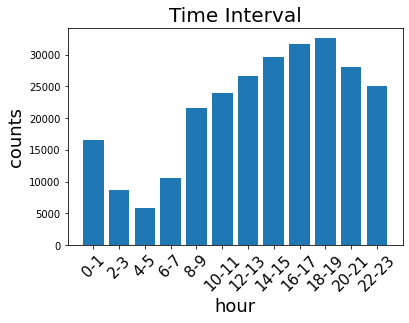

In [ ]:
plt.bar(bytime_data['TI'], bytime_data['counts'])
plt.title('Time Interval', fontsize=20)
plt.xlabel('hour', fontsize=18)
plt.ylabel('counts', fontsize=18)
plt.xticks(np.arange(len(bytime_data['TI'])), bytime_data['TI'], fontsize=15, rotation=45)
plt.show()